# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plot_config import (DataPlotType, RegPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

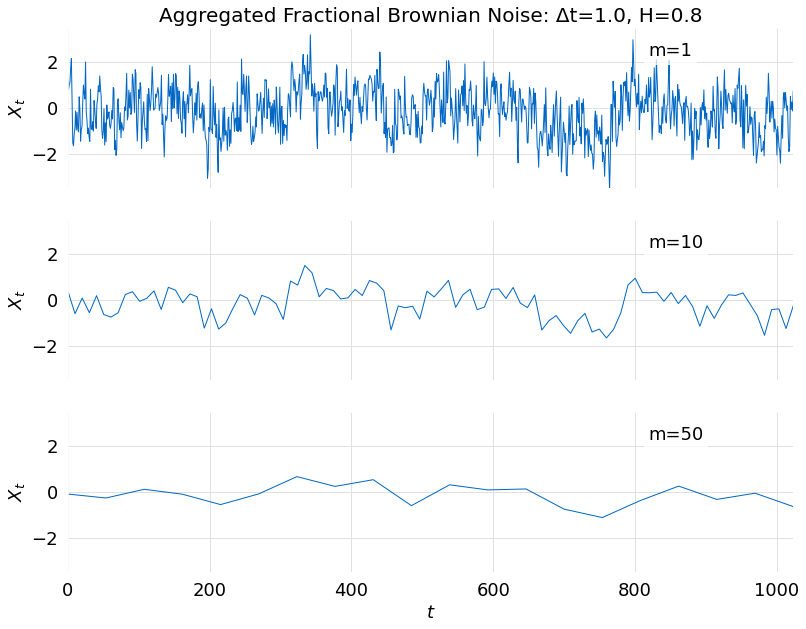

In [3]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [4]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     890.6
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           5.50e-51
Time:                        09:26:04   Log-Likelihood:                 165.67
No. Observations:                 100   AIC:                            -327.3
Df Residuals:                      98   BIC:                            -322.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1401      0.024      5.769      0.000       0.092       0.188
x1            -0.4724      0.016    -29.844      0.000      -0.504      -0.441
==============================================================================
Omnibus:                       13.692   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.938
Skew:                          -0.685   Prob(JB):                     0.000127
Kurtosis:                       4.558   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

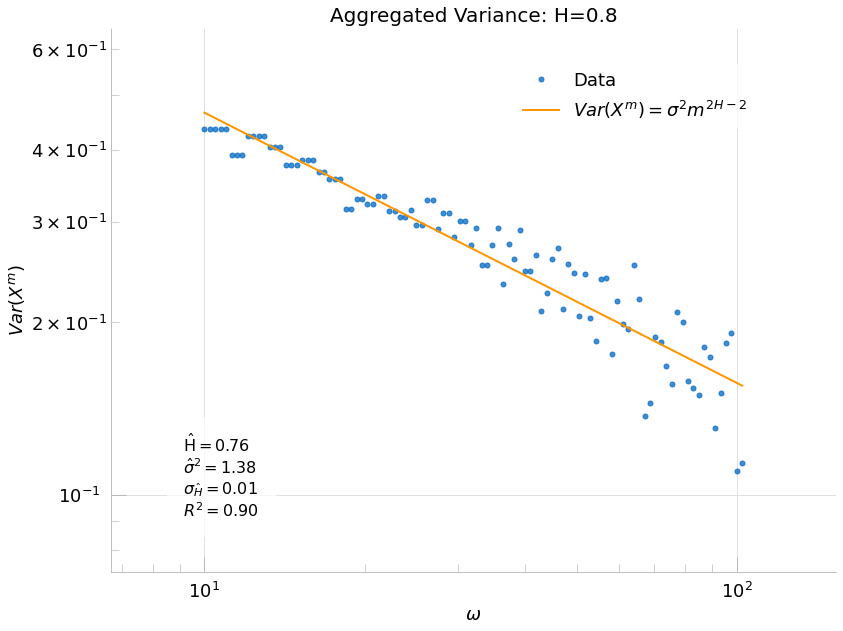

In [5]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

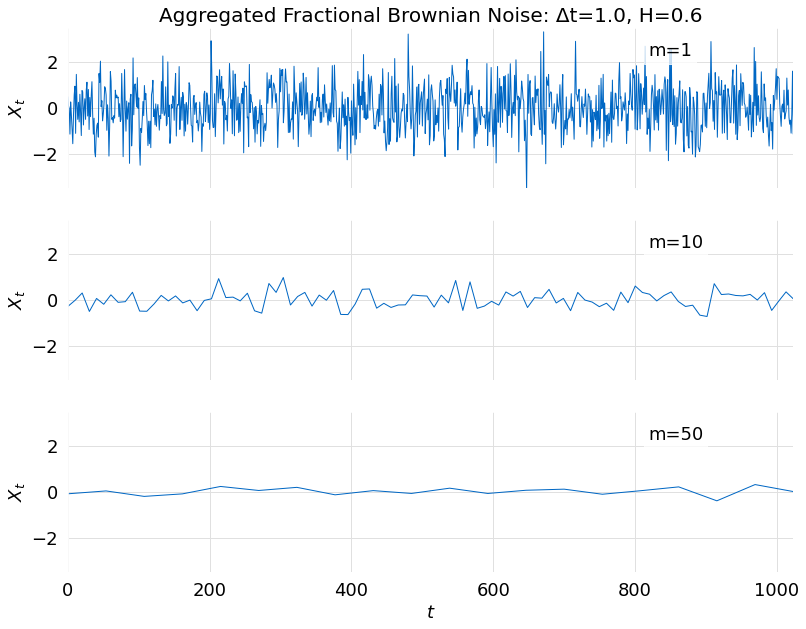

In [6]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [7]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1254.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.18e-57
Time:                        09:26:04   Log-Likelihood:                 87.616
No. Observations:                 100   AIC:                            -171.2
Df Residuals:                      98   BIC:                            -166.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4127      0.053      7.789      0.000       0.308       0.518
x1            -1.2235      0.035    -35.413      0.000      -1.292      -1.155
==============================================================================
Omnibus:                        7.083   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.927
Skew:                          -0.407   Prob(JB):                       0.0190
Kurtosis:                       4.114   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

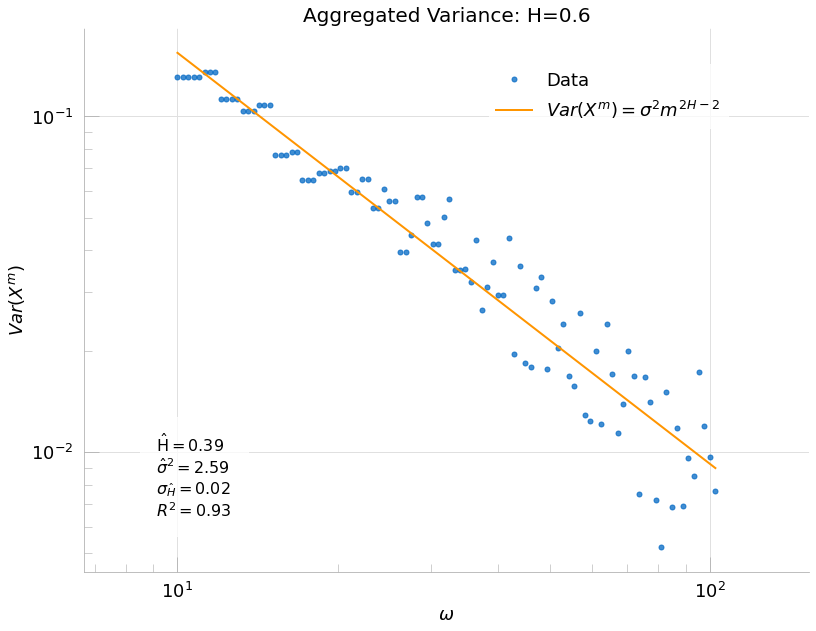

In [8]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

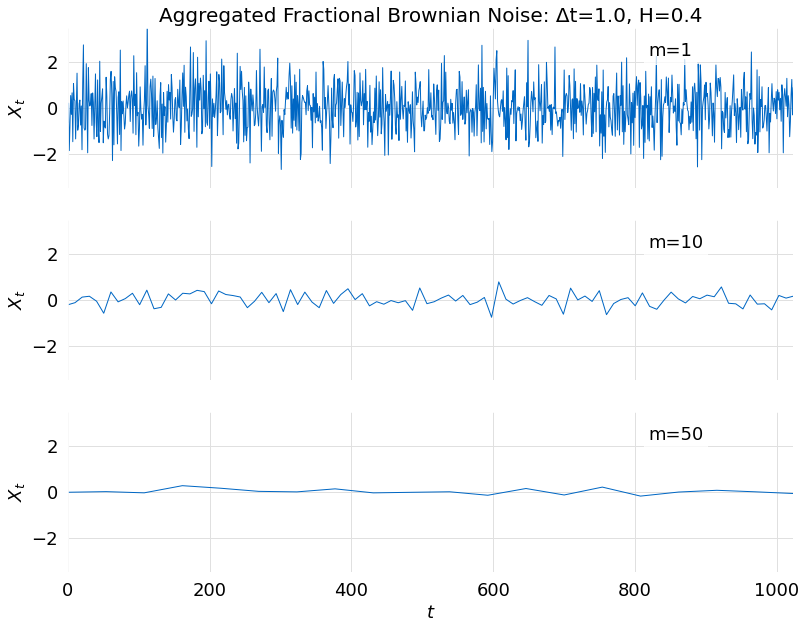

In [9]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [10]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1044.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.66e-54
Time:                        09:26:05   Log-Likelihood:                 76.320
No. Observations:                 100   AIC:                            -148.6
Df Residuals:                      98   BIC:                            -143.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1391      0.059      2.344      0.021       0.021       0.257
x1            -1.2498      0.039    -32.311      0.000      -1.327      -1.173
==============================================================================
Omnibus:                        4.160   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                4.655
Skew:                          -0.162   Prob(JB):                       0.0975
Kurtosis:                       4.006   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

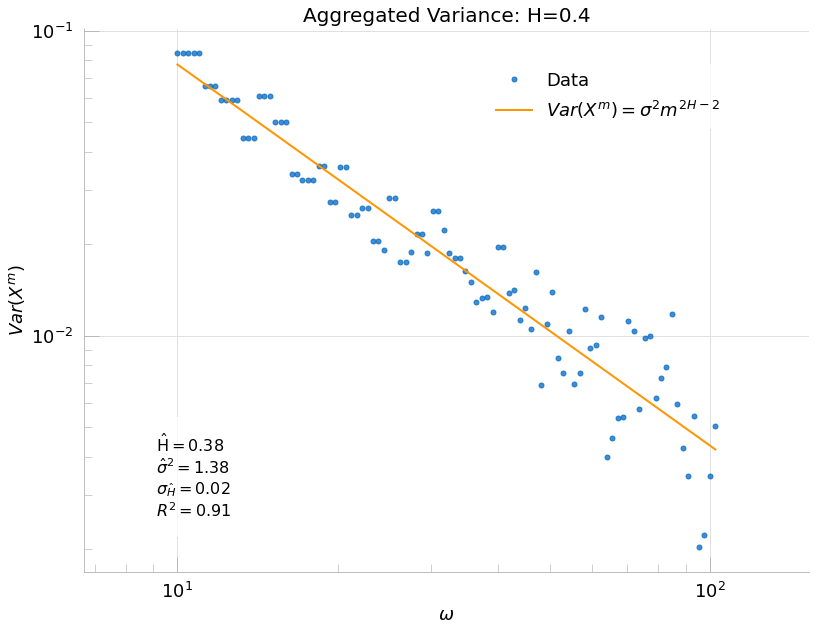

In [11]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

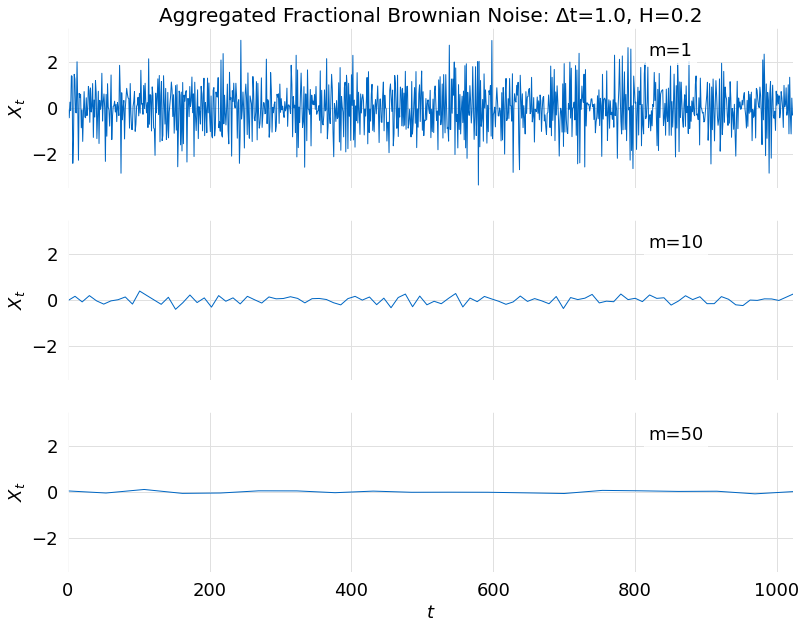

In [12]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [13]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1694.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.20e-63
Time:                        09:26:05   Log-Likelihood:                 75.716
No. Observations:                 100   AIC:                            -147.4
Df Residuals:                      98   BIC:                            -142.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.060      1.589      0.115      -0.024       0.213
x1            -1.6015      0.039    -41.153      0.000      -1.679      -1.524
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.309
Skew:                          -0.459   Prob(JB):                       0.0427
Kurtosis:                       3.820   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

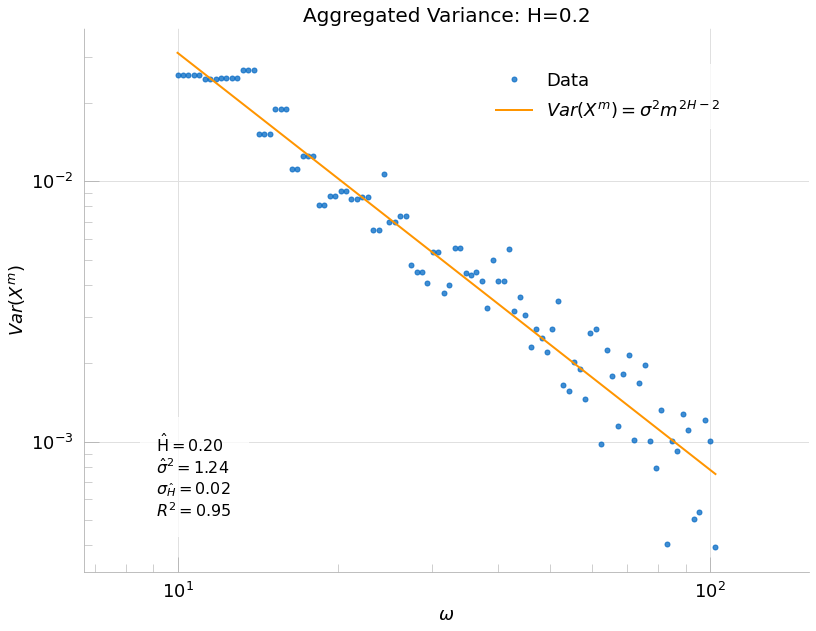

In [14]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)